In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 1. 영어 Word2Vec

In [2]:
# corpus 생성 
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

corpus = remove_stop_words(corpus)

In [3]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
        
words = set(words)

In [5]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [6]:
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])
df

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [7]:
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in corpus]

In [8]:
result

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [10]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# skip_gram
epochs = 10 
for i in range(epochs, 100001):

    model = Word2Vec(sentences=result , vector_size=2, window=2, min_count=1, workers=4, sg=1, epochs=epochs)
    print("epochs = {}:".format(epochs))
    print(model.wv.most_similar('king'))
    print("==================================")
    
    if epochs >= 100000:
        break 
    
    epochs *= 10 

epochs = 10:
[('queen', 0.9999566674232483), ('strong', 0.9786134362220764), ('girl', 0.9593400359153748), ('young', 0.4870659410953522), ('prince', -0.038260579109191895), ('princess', -0.6606067419052124), ('wise', -0.8621395826339722), ('woman', -0.9164537191390991), ('boy', -0.9518174529075623), ('man', -0.9543963074684143)]
epochs = 100:
[('queen', 0.9999473690986633), ('strong', 0.9780190587043762), ('girl', 0.9600571990013123), ('young', 0.46058326959609985), ('prince', -0.03612726181745529), ('princess', -0.6632906198501587), ('wise', -0.8637295365333557), ('woman', -0.9149326682090759), ('man', -0.9529099464416504), ('boy', -0.9537748098373413)]
epochs = 1000:
[('queen', 0.9941918253898621), ('girl', 0.9789624810218811), ('strong', 0.9354056715965271), ('young', 0.3420567512512207), ('prince', 0.1553337574005127), ('woman', -0.7562515139579773), ('man', -0.8178935647010803), ('princess', -0.8464264869689941), ('boy', -0.9571629762649536), ('wise', -0.9665645360946655)]
epochs 

In [11]:

epochs = 10 

# cbow
for i in range(epochs, 100001):

    model_2 = Word2Vec(sentences=result , vector_size=2, window=2, min_count=1, workers=4, sg=0, epochs=epochs)
    print("epochs = {}:".format(epochs))
    print(model_2.wv.most_similar('king'))
    print("==================================")
    
    if epochs >= 100000:
        break 
    
    epochs *= 10 
    
  

epochs = 10:
[('queen', 0.9999573826789856), ('strong', 0.9786267280578613), ('girl', 0.9593220353126526), ('young', 0.49325835704803467), ('prince', -0.03832473233342171), ('princess', -0.6611074209213257), ('wise', -0.8621071577072144), ('woman', -0.9164612889289856), ('boy', -0.9517977833747864), ('man', -0.9544155597686768)]
epochs = 100:
[('queen', 0.9999346137046814), ('strong', 0.9781001210212708), ('girl', 0.9599978923797607), ('young', 0.48758065700531006), ('prince', -0.033963583409786224), ('princess', -0.6637996435165405), ('wise', -0.8638198375701904), ('woman', -0.9155095219612122), ('man', -0.9530302286148071), ('boy', -0.9531843066215515)]
epochs = 1000:
[('queen', 0.9898203611373901), ('girl', 0.9886283278465271), ('strong', 0.9292777180671692), ('young', 0.27394381165504456), ('prince', 0.18258655071258545), ('woman', -0.7712288498878479), ('man', -0.8247809410095215), ('princess', -0.8795170783996582), ('wise', -0.9689924120903015), ('boy', -0.9730172157287598)]
epoc

In [12]:
vectors = [model.wv[i] for i in list(words)]

In [13]:
wv_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
wv_df['word'] = list(words)
wv_df = wv_df[['word', 'x1', 'x2']]
wv_df

,word,x1,x2
0,boy,-2.042974,0.155930
1,prince,-1.741249,0.250123
2,girl,-0.139966,1.647422
3,man,-1.430100,0.254045
4,king,-1.661467,0.192438
5,young,-0.494058,0.395903
6,wise,0.234068,5.208697
7,woman,-0.064553,1.814193
8,pretty,0.142883,3.616859
9,strong,-6.594695,-0.023162


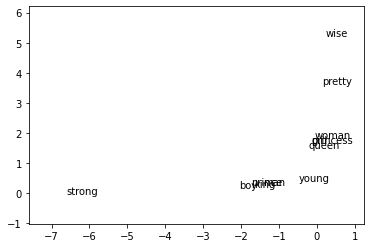

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(wv_df['word'], wv_df['x1'], wv_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (15,15)

plt.show()

In [ ]:
# 모델 저장 코드 
# model.wv.save_word2vec_format('eng_w2v') # 모델 저장
# loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
# 참고 git 
# https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

---

## 2. 한국어 Word2Vec 만들기(앱스토어  리뷰)

In [21]:
import requests
import os
import xmltodict

In [23]:
def get_url_index(url):
    response = requests.get(url).content.decode('utf8')
    xml = xmltodict.parse(response)

    last_url = [l['@href'] for l in xml['feed']['link'] if (l['@rel'] == 'last')][0]
    last_index = [int(s.replace('page=', '')) for s in last_url.split('/') if ('page=' in s)][0]

    return last_index

# https://stackoverflow.com/questions/1090282/api-to-monitor-iphone-app-store-reviews
def appstore_crawler(appid, outfile='./appstore_reviews.csv'):
    url = 'https://itunes.apple.com/kr/rss/customerreviews/page=1/id=%i/sortby=mostrecent/xml' % appid

    try:
        last_index = get_url_index(url)
    except Exception as e:
        print (url)
        print ('\tNo Reviews: appid %i' %appid)
        print ('\tException:', e)
        return

    result = list()
    for idx in range(1, last_index+1):
        url = "https://itunes.apple.com/kr/rss/customerreviews/page=%i/id=%i/sortby=mostrecent/xml?urlDesc=/customerreviews/id=%i/sortBy=mostRecent/xml" % (idx, appid, appid)
        print(url)

        response = requests.get(url).content.decode('utf8')
        try:
            xml = xmltodict.parse(response)
        except Exception as e:
            print ('\tXml Parse Error %s\n\tSkip %s :' %(e, url))
            continue

        try:
            num_reivews= len(xml['feed']['entry'])
        except Exception as e:
            print ('\tNo Entry', e)
            continue

        try:
            xml['feed']['entry'][0]['author']['name']
            single_reviews = False
        except:
            #print ('\tOnly 1 review!!!')
            single_reviews = True
            pass

        if single_reviews:
                result.append({
                    'USER': xml['feed']['entry']['author']['name'],
                    'DATE': xml['feed']['entry']['updated'],
                    'STAR': int(xml['feed']['entry']['im:rating']),
                    'LIKE': int(xml['feed']['entry']['im:voteSum']),
                    'TITLE': xml['feed']['entry']['title'],
                    'REVIEW': xml['feed']['entry']['content'][0]['#text'],
                })
        else:
            for i in range(len(xml['feed']['entry'])):
                result.append({
                    'USER': xml['feed']['entry'][i]['author']['name'],
                    'DATE': xml['feed']['entry'][i]['updated'],
                    'STAR': int(xml['feed']['entry'][i]['im:rating']),
                    'LIKE': int(xml['feed']['entry'][i]['im:voteSum']),
                    'TITLE': xml['feed']['entry'][i]['title'],
                    'REVIEW': xml['feed']['entry'][i]['content'][0]['#text'],
                })

    res_df = pd.DataFrame(result)
    res_df['DATE'] = pd.to_datetime(res_df['DATE'], format="%Y-%m-%dT%H:%M:%S")
    res_df.to_csv(outfile, encoding='utf-8-sig', index=False)
    print ('Save reviews to file: %s \n' %(outfile))


if __name__ == '__main__':
    # https://apps.apple.com/us/app/youtube-watch-listen-stream/id544007664
    app_id = 1444383602
    outfile = os.path.join('appstore_굿노트' + str(app_id)+'.csv')
    appstore_crawler(app_id, outfile=outfile)
    
    
    
    

https://itunes.apple.com/kr/rss/customerreviews/page=1/id=1444383602/sortby=mostrecent/xml?urlDesc=/customerreviews/id=1444383602/sortBy=mostRecent/xml
https://itunes.apple.com/kr/rss/customerreviews/page=2/id=1444383602/sortby=mostrecent/xml?urlDesc=/customerreviews/id=1444383602/sortBy=mostRecent/xml
https://itunes.apple.com/kr/rss/customerreviews/page=3/id=1444383602/sortby=mostrecent/xml?urlDesc=/customerreviews/id=1444383602/sortBy=mostRecent/xml
https://itunes.apple.com/kr/rss/customerreviews/page=4/id=1444383602/sortby=mostrecent/xml?urlDesc=/customerreviews/id=1444383602/sortBy=mostRecent/xml
https://itunes.apple.com/kr/rss/customerreviews/page=5/id=1444383602/sortby=mostrecent/xml?urlDesc=/customerreviews/id=1444383602/sortBy=mostRecent/xml
https://itunes.apple.com/kr/rss/customerreviews/page=6/id=1444383602/sortby=mostrecent/xml?urlDesc=/customerreviews/id=1444383602/sortBy=mostRecent/xml
https://itunes.apple.com/kr/rss/customerreviews/page=7/id=1444383602/sortby=mostrecent/x

In [65]:
data = pd.read_csv('/Users/dongyokim/main/jupyter/2022:Summer/자연어처리 스터디/워드 임베딩/appstore_굿노트1444383602.csv')

In [66]:
data

,USER,DATE,STAR,LIKE,TITLE,REVIEW
0,인호85,2022-07-23 19:32:05-07:00,2,0,Double-tap error after update,"After the recent update, the double-tap change..."
1,-더맨,2022-07-23 18:14:18-07:00,4,0,아예 밑줄이 직선으로 그어지지 않는게 아쉽…,평소 굿노트 평소 정말 잘 쓰고 있습니다.\n그런데 밑줄을 많이 긋느니라 밑줄 긋고...
2,초록이이리,2022-07-23 13:20:10-07:00,2,0,왜 이렇게 튕김현상이 심한가요,"렉이 너무 심해요ㅠㅠ̑̈ ㄱ,ㄴ,ㅇ 같은 한 획으로 쓰는 자음들 그냥 ㅡ 로 써져요..."
3,띠여여영,2022-07-23 00:36:10-07:00,5,0,그리기도구 옆쪽으로 배치할수있는 기능은 안될까요?,가로로 쓸때 위쪽공간이 좁아져서 답답하네요
4,아아아내니져쟈,2022-07-23 00:01:33-07:00,4,0,부탁,굿노트 때문에 갤탭이 아닌 아이패드를 산만큼 정말 잘 쓰고 있는 앱입니다. 위와 ...
...,...,...,...,...,...,...
495,gydms0410,2022-05-20 04:34:49-07:00,4,0,필기오류 조속히 해결해주세요,다른분들이랑 증상 또옥같구요. 애플센터를 지금 3번째 갔다왔는데 다른 어떤 앱에서도...
496,Seung26,2022-05-19 23:01:20-07:00,1,0,"최적화 제로, 버그투성이, 편의성 제로","최적화 제로, 버그투성이, 편의성 제로\n\n기대가 산산조각"
497,아345!#%,2022-05-19 22:47:10-07:00,2,0,에러,요즘 들어 굿노트 에러 발생이 심합니다. \n페이지 추가도 바로 안되고 꼭 앱 종료...
498,반박은현찰로,2022-05-19 22:03:24-07:00,2,0,펜 삐침 고쳐 주실 때 되지 않았나요?,편하게 쓰고 있는 건 맞지만 펜 삐침 너무 심합니다


In [67]:
len(data)

500

In [68]:
# NULL 값 존재 유무
print(data.isnull().values.any())
train_data = data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(data.isnull().values.any()) # Null 값이 존재하는지 확인

False
False


In [69]:
# 정규 표현식을 통한 한글 외 문자 제거
data['REVIEW'] = data['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/var/folders/7d/bm3zqtjx7xsb__yxj254h7kh0000gn/T/ipykernel_84564/1854448483.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['REVIEW'] = data['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [72]:
import tqdm

In [74]:
from konlpy.tag import Okt
import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in data['REVIEW']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 : 302
리뷰의 평균 길이 : 28.622


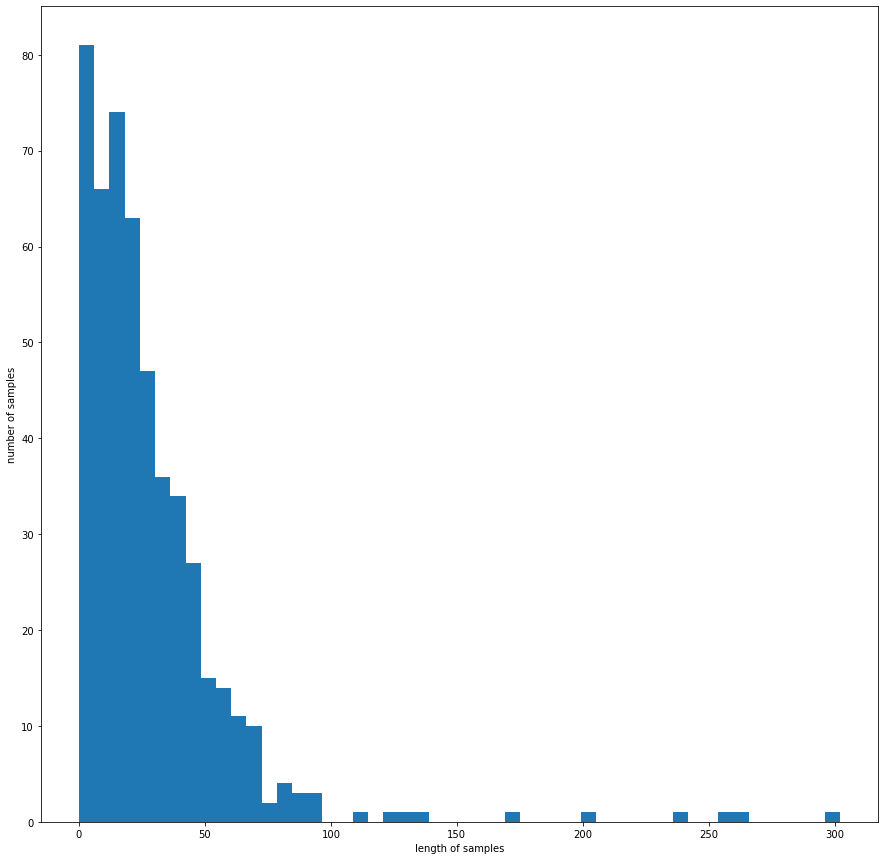

In [75]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [91]:
from gensim.models import Word2Vec
epochs = 10

for i in range(epochs, 5001):
    model = Word2Vec(sentences = tokenized_data, vector_size = 50, window = 2, min_count = 4, workers = 4, sg = 1, epochs=epochs)
    print(f"epoch = {epochs}")
    print(model.wv.most_similar("버그"))
    print("===========================")
    print()
    
    if epochs >= 5000:
        break
                     
    epochs *= 5 

epoch = 10
[('백지', 0.9964235424995422), ('인가요', 0.9961335062980652), ('아예', 0.9960492253303528), ('느리다', 0.996004045009613), ('열', 0.9960024356842041), ('지경', 0.995883047580719), ('손', 0.9958587288856506), ('하루', 0.9957991242408752), ('삭제', 0.9957828521728516), ('모두', 0.9957519173622131)]

epoch = 50
[('및', 0.7292653322219849), ('답변', 0.6961061358451843), ('아무리', 0.6845795512199402), ('ㅡㅡ', 0.654190182685852), ('빠르다', 0.6439700722694397), ('참고', 0.6367633938789368), ('분', 0.6238753199577332), ('엄청', 0.621817946434021), ('시일', 0.6200374364852905), ('오류', 0.607494592666626)]

epoch = 250
[('안다', 0.49944180250167847), ('답변', 0.4950755536556244), ('다운', 0.47399887442588806), ('받다', 0.4669983386993408), ('에요', 0.45517173409461975), ('유료', 0.45086708664894104), ('스트레스', 0.44332194328308105), ('증상', 0.4312060475349426), ('나타나다', 0.42056578397750854), ('이건', 0.41274958848953247)]

epoch = 1250
[('스트레스', 0.5481268167495728), ('받다', 0.4925280809402466), ('답변', 0.47073906660079956), ('형광', 0.4628